In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.special as spc
import statsmodels.api as sm

In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

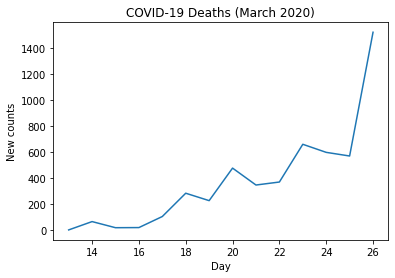

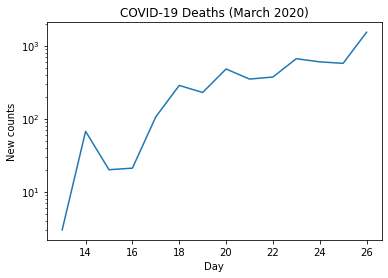

In [2]:
# New York State
days = np.array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
counts = np.array([47, 50, 117, 137, 158, 264, 549, 777, 1255, 1603, 1974, 2635, 3234, 3805, 5327])
# Santa Clara County
#days = np.array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
#counts = np.array([1, 2, 2, 4, 5, 6, 6, 8, 8, 10, 13, 16, 17, 19, 20])
new_counts = np.diff(counts)
days = days[1:]
plt.plot(days, new_counts)
plt.ylabel('New counts')
plt.xlabel('Day')
plt.title('COVID-19 Deaths (March 2020)')
plt.show()
plt.semilogy(days, new_counts)
plt.ylabel('New counts')
plt.xlabel('Day')
plt.title('COVID-19 Deaths (March 2020)')
plt.show()

Fitting a Poisson model with statsmodels:

In [3]:
poisson_model = sm.GLM(new_counts, sm.add_constant(days), family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -412.77
Date:                Tue, 09 Mar 2021   Deviance:                       728.14
Time:                        16:48:05   Pearson chi2:                     691.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4377      0.104      4.204      0.0

Trend line and confidence intervals:

MLE  : 0.437686 0.256797
Lower: 0.233636 0.247995
Upper: 0.641735 0.265598


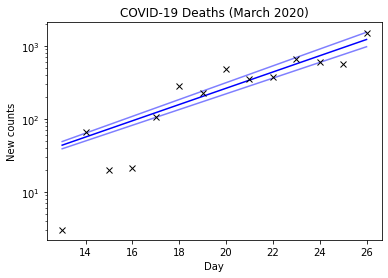

In [4]:
def get_params_and_confint(fitted_glm):
    beta0_MLE = fitted_glm.params[0]
    beta1_MLE = fitted_glm.params[1]

    # Compute the confidence interval on beta_1.
    confint = fitted_glm.conf_int(cols=(0,))[0]
    beta0_lower = confint[0]
    beta0_upper = confint[1]
    
    # Compute the confidence interval on beta_1.
    confint = fitted_glm.conf_int(cols=(1,))[0]
    beta1_lower = confint[0]
    beta1_upper = confint[1]
    
    return (beta0_MLE, beta1_MLE), (beta0_lower, beta1_lower), (beta0_upper, beta1_upper)

mle, lower, upper = get_params_and_confint(poisson_results)
print('MLE  : %f %f' % mle)
print('Lower: %f %f' % lower)
print('Upper: %f %f' % upper)

plt.plot(days, np.exp(mle[0] + mle[1] * days), 'b')
plt.plot(days, np.exp(mle[0] + lower[1] * days), 'b', alpha=0.5)
plt.plot(days, np.exp(mle[0] + upper[1] * days), 'b', alpha=0.5)
plt.semilogy(days, new_counts, 'kx')
plt.ylabel('New counts')
plt.xlabel('Day')
plt.title('COVID-19 Deaths (March 2020)')
plt.show()

In [5]:
nb_model = sm.GLM(new_counts, sm.add_constant(days), family=sm.families.NegativeBinomial())
nb_results = nb_model.fit()
print(nb_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                       12
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.035
Date:                Tue, 09 Mar 2021   Deviance:                       6.4450
Time:                        16:48:05   Pearson chi2:                     4.87
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7555      1.331     -0.567      0.5

Better-calibrated uncertainty when using NB model:

MLE  : -0.755488 0.313389
Lower: -3.364879 0.182571
Upper: 1.853903 0.444207


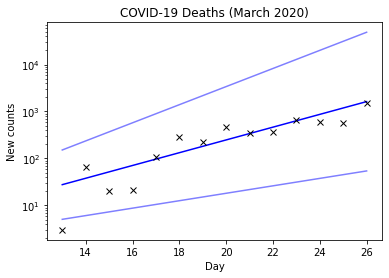

In [6]:
mle, lower, upper = get_params_and_confint(nb_results)
print('MLE  : %f %f' % mle)
print('Lower: %f %f' % lower)
print('Upper: %f %f' % upper)

plt.plot(days, np.exp(mle[0] + mle[1] * days), 'b')
plt.plot(days, np.exp(mle[0] + lower[1] * days), 'b', alpha=0.5)
plt.plot(days, np.exp(mle[0] + upper[1] * days), 'b', alpha=0.5)
plt.semilogy(days, new_counts, 'kx')
plt.ylabel('New counts')
plt.xlabel('Day')
plt.title('COVID-19 Deaths (March 2020)')
plt.show()

For comparison, fitting a model with plain old ordinary least squares:

In [7]:
gaussian_model = sm.GLM(np.log(new_counts), sm.add_constant(days), family=sm.families.Gaussian())
#gaussian_model = sm.GLM(np.log(new_counts), sm.add_constant(days), family=sm.families.Gaussian())
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                       12
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.66457
Method:                          IRLS   Log-Likelihood:                -15.926
Date:                Tue, 09 Mar 2021   Deviance:                       7.9748
Time:                        16:48:06   Pearson chi2:                     7.97
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0389      1.076     -1.894      0.0

MLE  : -2.038888 0.366797
Lower: -4.148238 0.260865
Upper: 0.070461 0.472729


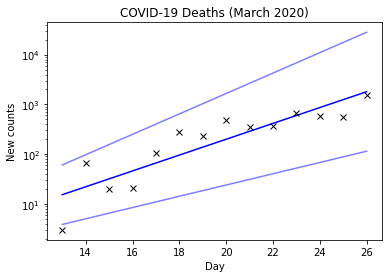

In [8]:
mle, lower, upper = get_params_and_confint(gaussian_results)
print('MLE  : %f %f' % mle)
print('Lower: %f %f' % lower)
print('Upper: %f %f' % upper)

plt.plot(days, np.exp(mle[0] + mle[1] * days), 'b')
plt.plot(days, np.exp(mle[0] + lower[1] * days), 'b', alpha=0.5)
plt.plot(days, np.exp(mle[0] + upper[1] * days), 'b', alpha=0.5)
plt.semilogy(days, new_counts, 'kx')
plt.ylabel('New counts')
plt.xlabel('Day')
plt.title('COVID-19 Deaths (March 2020)')
plt.show()

Finally, let's use the bootstrap to fix the issues with the Poisson model:

In [9]:
def get_beta(X, y):
    poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
    poisson_results = poisson_model.fit()
    return poisson_results.params # params[0] is intercept term
                                  # params[1] is days term
samples = bootstrap_xy(sm.add_constant(days), new_counts, fnc=get_beta)

NameError: name 'bootstrap_xy' is not defined

In [ ]:
plt.hist(samples[:,1], bins=np.arange(0.10, 0.45, 0.025))
plt.show()
print('Median: %.3f' % np.median(samples[:,1]))
print('5th percentile: %.3f' % np.quantile(samples[:,1], 0.05))
print('95th percentile: %.3f' % np.quantile(samples[:,1], 0.95))